# 1개

In [2]:
# Chrome WebDriver 설정
options = webdriver.ChromeOptions()
driver = webdriver.Chrome(service=Service(ChromeDriverManager().install()), options=options)

# 페이지 열기
url = "https://charts.youtube.com/charts/TopSongs/kr/weekly/20241226"
driver.get(url)

# 페이지 로드 대기
time.sleep(3)

# 페이지 소스 가져오기
soup = BeautifulSoup(driver.page_source, 'html.parser')

# 해당 클래스의 div 태그 찾기
div_tag = soup.find('div', class_='ytmc-chart-table-v2-container')

print(div_tag)

<div class="ytmc-chart-table-v2-container style-scope ytmc-detailed-page">
<ytmc-chart-table-v2 class="style-scope ytmc-detailed-page"><!--css_build_mark:video.youtube.src.web.polymer.music_charts.components.ui.ytmc_chart_table_v2.ytmc.chart.table.v2.css.js--><!--css_build_scope:ytmc-chart-table-v2--><!--css_build_styles:video.youtube.src.web.polymer.music.app.ui.shared.styles.ytmusic_base_styles.ytmusic.base.styles.css.js,video.youtube.src.web.polymer.shared.ui.styles.yt_base_styles.yt.base.styles.css.js,video.youtube.src.web.polymer.music_charts.components.ui.ytmc_chart_table_v2.ytmc.chart.table.v2.css.js--><div class="chart-table-container style-scope ytmc-chart-table-v2">
<div class="content table-header style-scope ytmc-chart-table-v2">
<span class="table-header-rank style-scope ytmc-chart-table-v2">순위</span>
<div class="table-header-thumbnail style-scope ytmc-chart-table-v2"></div>
<span class="table-header-metric style-scope ytmc-chart-table-v2" hidden="">
      발매일
    </span>


In [255]:
tag = div_tag.find('div', {'class':'chart-table-container'})
tag

<div class="chart-table-container style-scope ytmc-chart-table-v2">
<div class="content table-header style-scope ytmc-chart-table-v2">
<span class="table-header-rank style-scope ytmc-chart-table-v2">순위</span>
<div class="table-header-thumbnail style-scope ytmc-chart-table-v2"></div>
<span class="table-header-metric style-scope ytmc-chart-table-v2" hidden="">
      발매일
    </span>
<span class="table-header-metric style-scope ytmc-chart-table-v2" id="last-period">
      지난주
    </span>
<span class="table-header-metric tablet-non-displayed-metric style-scope ytmc-chart-table-v2" id="periods-on-chart">
      차트 지속기간(주)
    </span>
<span class="table-header-metric tablet-non-displayed-metric style-scope ytmc-chart-table-v2" id="views">
      주간 조회수
    </span>
</div>
<ytmc-entry-row class="style-scope ytmc-chart-table-v2"><!--css_build_mark:video.youtube.src.web.polymer.music_charts.components.ui.ytmc_entry_row.ytmc.entry.row.css.js--><!--css_build_scope:ytmc-entry-row--><!--css_build_style

In [256]:
#rank(1~100) list
rank = tag.find_all('span', {'id':'rank'})
rank_list = []

for i in range(len(rank)):
    rank_list.append(rank[i].text)

#title list
title = tag.find_all('div', {'id':'entity-title'})
title_list = []

for i in range(len(title)):
    title_list.append(title[i].text.strip())

# artist list
artist = tag.find_all('div', {'id': 'artist-names'})
artist_list = []

for i in range(len(artist)):
    artist_spans = artist[i].find_all('span', {'hidden': False})    #hidden 속성 X => text 반복 제외
    artist_name = " ".join([span.text.strip() for span in artist_spans])    #strip()으로 분리하고 join()으로 하나로 합치기 => ex. "로제 & 브루노마스" 분리 방지
    artist_list.append(artist_name)

#[발매일, 지난주 순위]
releaseNlast_week = tag.find_all('div', {'class':'metric content center style-scope ytmc-entry-row'}, {'hidden':False})
release_list = []
last_week_list = []

for i in range(len(releaseNlast_week)):    
    #발매일
    if i % 2 == 0:
        release_list.append(releaseNlast_week[i].text.strip())
    #지난주 순위
    else:
        last_week_list.append(releaseNlast_week[i].text.strip())

#지난주 순위랑 같을 경우('-') → 0
for i in range(len(last_week_list)):
    if last_week_list[i] == '-':
        last_week_list[i] = '0'

#[차트 지속기간(주), 주간 조회수]
durationNplay = tag.find_all('div', {'class':'metric content center tablet-non-displayed-metric style-scope ytmc-entry-row'}, {'hidden':False})
duration_list = []
play_list = []

for i in range(len(durationNplay)):
    #차트 지속기간(주)
    if i % 2 == 0:
        duration_list.append(durationNplay[i].text.strip())
    else:
        play_list.append(durationNplay[i].text.strip().replace(',', ''))    #4,582,686 → 4582686

In [257]:
data = {
    '순위':rank_list,
    '제목':title_list,
    '가수':artist_list,
    '발매일':release_list,
    '지난주':last_week_list,
    '지속기간':duration_list,
    '조회수':play_list
}

df = pd.DataFrame(data)
df[['순위', '지난주', '지속기간', '조회수']] = df[['순위', '지난주', '지속기간', '조회수']].astype('int')
df['발매일'] = pd.to_datetime(df['발매일'], format='%b %d, %Y')

df.head()

순위                               제목           가수        발매일  지난주  지속기간  \
0   1                             APT.  로제 & 브루노 마스 2024-10-18    1    10   
1   2  HOME SWEET HOME (feat. 태양 & 대성)     G-DRAGON 2024-11-22    2     5   
2   3                         Whiplash        aespa 2024-10-21    3    10   
3   4               toxic till the end           로제 2024-12-05    4     3   
4   5                  Drowning (Live)        WOODZ 2023-04-26    6    13   

       조회수  
0  4582686  
1  3993657  
2  3476261  
3  2888778  
4  2313519

In [258]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   순위      100 non-null    int32         
 1   제목      100 non-null    object        
 2   가수      100 non-null    object        
 3   발매일     100 non-null    datetime64[ns]
 4   지난주     100 non-null    int32         
 5   지속기간    100 non-null    int32         
 6   조회수     100 non-null    int32         
dtypes: datetime64[ns](1), int32(4), object(2)
memory usage: 4.0+ KB


----

In [250]:
# 2024년, 1주차부터 52주차까지 크롤링
start_date = datetime(2024, 1, 4)  # 시작 날짜

for week in range(1, 53):
    week_date = start_date + timedelta(weeks=week-1)
    url = "https://charts.youtube.com/charts/TopSongs/kr/weekly/{}{:02d}{:02d}".format(week_date.year, week_date.month, week_date.day)
    print(url)

https://charts.youtube.com/charts/TopSongs/kr/weekly/20240104
https://charts.youtube.com/charts/TopSongs/kr/weekly/20240111
https://charts.youtube.com/charts/TopSongs/kr/weekly/20240118
https://charts.youtube.com/charts/TopSongs/kr/weekly/20240125
https://charts.youtube.com/charts/TopSongs/kr/weekly/20240201
https://charts.youtube.com/charts/TopSongs/kr/weekly/20240208
https://charts.youtube.com/charts/TopSongs/kr/weekly/20240215
https://charts.youtube.com/charts/TopSongs/kr/weekly/20240222
https://charts.youtube.com/charts/TopSongs/kr/weekly/20240229
https://charts.youtube.com/charts/TopSongs/kr/weekly/20240307
https://charts.youtube.com/charts/TopSongs/kr/weekly/20240314
https://charts.youtube.com/charts/TopSongs/kr/weekly/20240321
https://charts.youtube.com/charts/TopSongs/kr/weekly/20240328
https://charts.youtube.com/charts/TopSongs/kr/weekly/20240404
https://charts.youtube.com/charts/TopSongs/kr/weekly/20240411
https://charts.youtube.com/charts/TopSongs/kr/weekly/20240418
https://

---

# 여기서부터

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

import requests
from re import escape
from bs4 import BeautifulSoup
from selenium import webdriver
from selenium.webdriver.chrome.service import Service
from webdriver_manager.chrome import ChromeDriverManager
from bs4 import BeautifulSoup
import time
from datetime import datetime, timedelta

plt.rcParams['font.family'] = 'Malgun Gothic'

# 2023년 12월 29일 ~ 12월 26일 주간 차트

In [2]:
# Chrome WebDriver 설정
options = webdriver.ChromeOptions()
driver = webdriver.Chrome(service=Service(ChromeDriverManager().install()), options=options)

df2024 = []
cnt = 0

start_date = datetime(2024, 1, 4)  # 시작 날짜

for week in range(1, 53):
    week_date = start_date + timedelta(weeks=week-1)
    url = "https://charts.youtube.com/charts/TopSongs/kr/weekly/{}{:02d}{:02d}".format(week_date.year, week_date.month, week_date.day)

    driver.get(url)

    # 페이지 로드 대기
    time.sleep(3)

    # 페이지 소스 가져오기
    soup = BeautifulSoup(driver.page_source, 'html.parser')

    div_tag = soup.find('div', class_='ytmc-chart-table-v2-container')  #여기까지는 출력됨
    tag = div_tag.find('div', {'class':'chart-table-container'})    #여기까지는 출력됐음

    #rank(1~100) list
    rank = tag.find_all('span', {'id':'rank'})
    rank_list = []

    for i in range(len(rank)):
        rank_list.append(rank[i].text)

    #title list
    title = tag.find_all('div', {'id':'entity-title'})
    title_list = []

    for i in range(len(title)):
        title_list.append(title[i].text.strip())

    # artist list
    artist = tag.find_all('div', {'id': 'artist-names'})
    artist_list = []

    for i in range(len(artist)):
        artist_spans = artist[i].find_all('span', {'hidden': False})    #hidden 속성 X => text 반복 제외
        artist_name = " ".join([span.text.strip() for span in artist_spans])    #strip()으로 분리하고 join()으로 하나로 합치기 => ex. "로제 & 브루노마스" 분리 방지
        artist_list.append(artist_name)

    #[발매일, 지난주 순위]
    releaseNlast_week = tag.find_all('div', {'class':'metric content center style-scope ytmc-entry-row'}, {'hidden':False})
    release_list = []
    last_week_list = []

    for i in range(len(releaseNlast_week)):    
        #발매일
        if i % 2 == 0:
            release_list.append(releaseNlast_week[i].text.strip())
        #지난주 순위
        else:
            last_week_list.append(releaseNlast_week[i].text.strip())

    #지난주 순위랑 같을 경우('-') → 0
    for i in range(len(last_week_list)):
        if last_week_list[i] == '-':
            last_week_list[i] = '0'

    #[차트 지속기간(주), 주간 조회수]
    durationNplay = tag.find_all('div', {'class':'metric content center tablet-non-displayed-metric style-scope ytmc-entry-row'}, {'hidden':False})
    duration_list = []
    play_list = []

    for i in range(len(durationNplay)):
        #차트 지속기간(주)
        if i % 2 == 0:
            duration_list.append(durationNplay[i].text.strip())
        else:
            play_list.append(durationNplay[i].text.strip().replace(',', ''))    #4,582,686 → 4582686
    
    #몇 주 차
    cnt += 1

    data = {
        '순위':rank_list,
        '제목':title_list,
        '가수':artist_list,
        '발매일':release_list,
        '지난주 순위':last_week_list,
        '차트 지속기간':duration_list,
        '조회수':play_list,
        '주차':cnt
    }

    a = pd.DataFrame(data)
    a[['순위', '지난주 순위', '차트 지속기간', '조회수', '주차']] = a[['순위', '지난주 순위', '차트 지속기간', '조회수', '주차']].astype('int')
    a['발매일'] = pd.to_datetime(a['발매일'], format='%b %d, %Y')

    df2024.append(a)

df = pd.concat(df2024)
df['가수'] = df['가수'].str.replace(r'\s?\(.*\)$', '', regex=True)

df.shape    #(5200, 7) => 100등 X 52주

(5200, 8)

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5200 entries, 0 to 99
Data columns (total 8 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   순위       5200 non-null   int32         
 1   제목       5200 non-null   object        
 2   가수       5200 non-null   object        
 3   발매일      5200 non-null   datetime64[ns]
 4   지난주 순위   5200 non-null   int32         
 5   차트 지속기간  5200 non-null   int32         
 6   조회수      5200 non-null   int32         
 7   주차       5200 non-null   int32         
dtypes: datetime64[ns](1), int32(5), object(2)
memory usage: 264.1+ KB


In [4]:
df

순위                   제목        가수        발매일  지난주 순위  차트 지속기간      조회수  \
0     1        Perfect Night      르세라핌 2023-10-27       1       10  3670329   
1     2                Drama     aespa 2023-11-08       2        8  3339128   
2     3                 디스코드      QWER 2023-10-18       3       12  2571909   
3     4                To. X        태연 2023-11-27       5        6  2298120   
4     5  Rhapsody of Sadness       임재현 2023-12-03      27        4  2296863   
..  ...                  ...       ...        ...     ...      ...      ...   
95   96                녹아내려요      DAY6 2024-09-02       0       15   317729   
96   97        IF YOU (Live)   BIGBANG 2015-07-01      93        5   315921   
97   98         Heart Shaker     TWICE 2017-12-11       0       43   313380   
98   99              Gravity   피프티 피프티 2024-09-20      96       14   306193   
99  100               집에 가지마  GD & TOP 2010-12-24       0        1   305620   

    주차  
0    1  
1    1  
2    1  
3    1  
4    1  
..  ..  
95  52  
96  52  
97  52  
98  52  
99  52  

[5200 rows x 8 columns]

---

# 아티스트

In [171]:
df.가수.value_counts().describe()

count    387.000000
mean      13.436693
std       24.211032
min        1.000000
25%        2.000000
50%        5.000000
75%       13.000000
max      185.000000
Name: count, dtype: float64

In [172]:
df.가수.value_counts().describe(percentiles=[0.7, 0.95])

count    387.000000
mean      13.436693
std       24.211032
min        1.000000
50%        5.000000
70%       10.000000
95%       52.700000
max      185.000000
Name: count, dtype: float64

In [193]:
value_counts = df['가수'].value_counts()
q70 = value_counts.quantile(0.7)
q95 = value_counts.quantile(0.95)

# 각각의 값에 해당하는 가수 수
count_7 = (value_counts < q70).sum()
count_795 = ((q70 <= value_counts) & (value_counts < q95)).sum() #Series 연산에서는 연산 부등식 X
count_95 = (q95 <= value_counts).sum()

# 각 비율에 해당하는 가수들의 데이터프레임
df_q70 = df[df['가수'].isin(value_counts[value_counts <= q70].index)]
df_q7095 = df[df['가수'].isin(value_counts[(q70 < value_counts) & (value_counts <= q95)].index)]
df_q95 = df[df['가수'].isin(value_counts[q95 <= value_counts].index)]

**차트 진입 상위 95% 이상 아티스트**

In [194]:
df_q95

순위               제목       가수        발매일  지난주 순위  차트 지속기간      조회수  주차
0    1    Perfect Night     르세라핌 2023-10-27       1       10  3670329   1
1    2            Drama    aespa 2023-11-08       2        8  3339128   1
2    3             디스코드     QWER 2023-10-18       3       12  2571909   1
3    4            To. X       태연 2023-11-27       5        6  2298120   1
5    6           후라이의 꿈     AKMU 2023-08-21       8       20  2267406   1
..  ..              ...      ...        ...     ...      ...      ...  ..
76  77  사랑해요 그대를 (Live)      임영웅 2024-12-04      75        3   379521  52
79  80             Blue  BIGBANG 2012-02-21      88        6   376544  52
82  83   Fantastic Baby  BIGBANG 2010-10-11     100        5   364102  52
95  96            녹아내려요     DAY6 2024-09-02       0       15   317729  52
96  97    IF YOU (Live)  BIGBANG 2015-07-01      93        5   315921  52

[2029 rows x 8 columns]

In [334]:
df_q95.query("가수 == 'BIGBANG'")

순위                    제목       가수        발매일  지난주 순위  차트 지속기간     조회수  주차
86  87  봄여름가을겨울 (Still Life)  BIGBANG 2022-04-04       0       30  424085   1
68  69  봄여름가을겨울 (Still Life)  BIGBANG 2022-04-04       0       31  438944  12
58  59  봄여름가을겨울 (Still Life)  BIGBANG 2022-04-04      69       32  530386  13
56  57  봄여름가을겨울 (Still Life)  BIGBANG 2022-04-04      59       33  581421  14
47  48  봄여름가을겨울 (Still Life)  BIGBANG 2022-04-04      57       34  681219  15
..  ..                   ...      ...        ...     ...      ...     ...  ..
58  59   붉은 노을 (Sunset Glow)  BIGBANG 2008-11-05      71       19  535095  52
72  73                   맨정신  BIGBANG 2015-06-30      81        5  406074  52
79  80                  Blue  BIGBANG 2012-02-21      88        6  376544  52
82  83        Fantastic Baby  BIGBANG 2010-10-11     100        5  364102  52
96  97         IF YOU (Live)  BIGBANG 2015-07-01      93        5  315921  52

[62 rows x 8 columns]

**주차별 가수 조회수**
- 꾸준한 인기도 확인

In [126]:
df_q95_g = df_q95.groupby(['가수', '주차'])[['조회수']].sum().reset_index()
df_q95_g

가수  주차      조회수
0    (여자)아이들   1  1032335
1    (여자)아이들   2   949228
2    (여자)아이들   3   853371
3    (여자)아이들   4  2999820
4    (여자)아이들   5  6881849
..       ...  ..      ...
929       태연  48  2745566
930       태연  49  1425342
931       태연  50   660384
932       태연  51   488358
933       태연  52   407500

[934 rows x 3 columns]

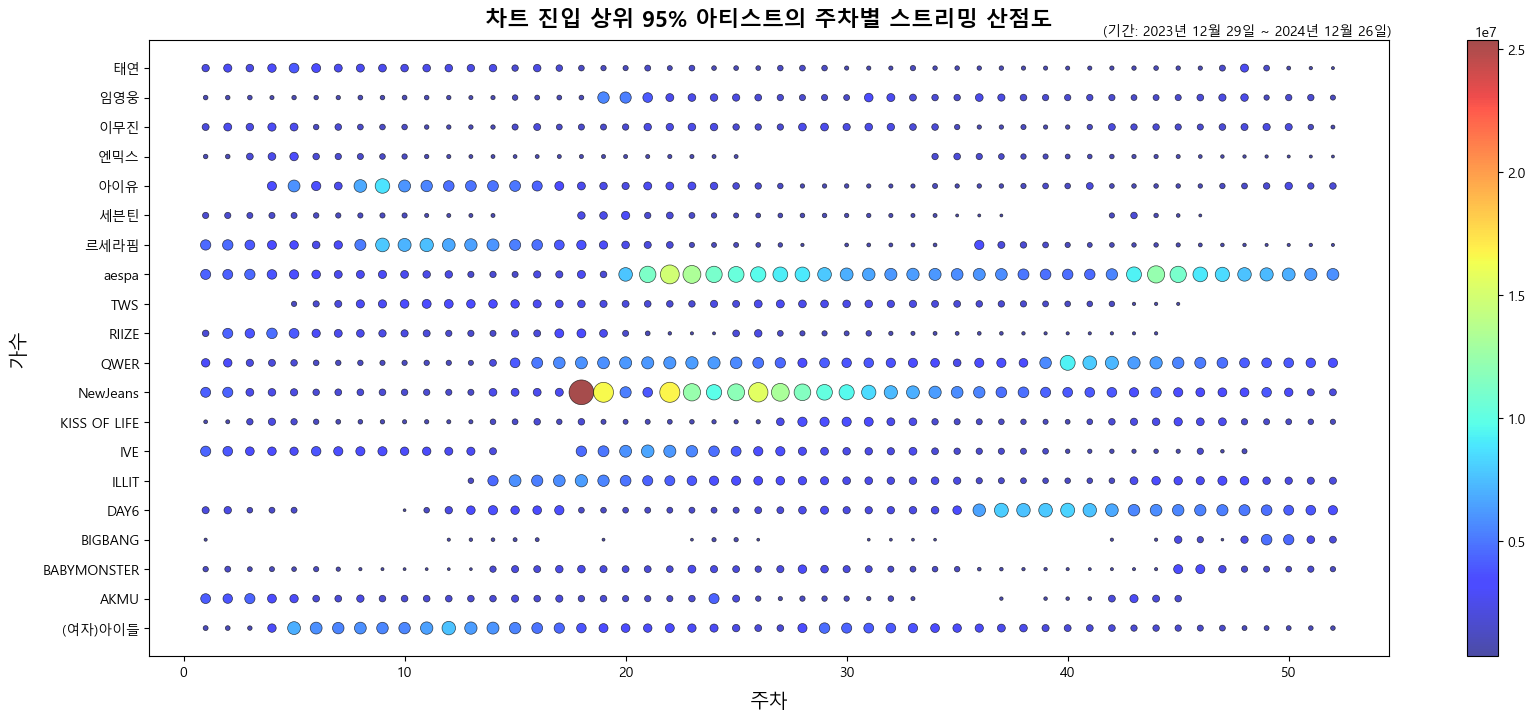

In [522]:
fig, ax = plt.subplots(figsize=(20, 8))

sc = ax.scatter(
    df_q95_g['주차'], df_q95_g['가수'],
    linewidth = 0.5, edgecolor ='k', alpha = 0.7,
    s = df_q95_g['조회수'] / 80000, c = df_q95_g['조회수'], cmap='jet'
)

fig.colorbar(sc)

plt.title('차트 진입 상위 95% 아티스트의 주차별 스트리밍 산점도', fontsize=16, weight='bold', pad=10)
ax.set_xlabel('주차', fontsize=14, labelpad=10)
ax.set_ylabel('가수', fontsize=14, labelpad=10)

plt.text(1.002, 1.025, '(기간: 2023년 12월 29일 ~ 2024년 12월 26일)', ha='right', va='top', transform=ax.transAxes)

plt.show()

---

**아티스트별 차트 진입 횟수 대비 차트 진입 곡 개수**
- 다양한 장르의 곡을 사랑받는가

In [201]:
df_q95_cnt = df_q95.groupby('가수')[['제목']].nunique().reset_index()
df_q95_cnt['차트 진입 횟수'] = list(df_q95.groupby("가수")['가수'].count())
df_q95_cnt['비율'] = round((df_q95_cnt['제목'] / df_q95_cnt['차트 진입 횟수']) * 100, 2)

df_q95_cnt = df_q95_cnt.sort_values('차트 진입 횟수', ascending=False)

In [202]:
df_q95_cnt

가수  제목  차트 진입 횟수     비율
8       NewJeans  14       185   7.57
12         aespa  17       177   9.60
4           DAY6  11       158   6.96
15           아이유  12       127   9.45
9           QWER   7       123   5.69
0        (여자)아이들   6       113   5.31
17           이무진   7       108   6.48
6            IVE  14       107  13.08
18           임영웅   8       100   8.00
13          르세라핌   7        99   7.07
10         RIIZE  10        88  11.36
7   KISS OF LIFE  10        88  11.36
1           AKMU  11        80  13.75
2    BABYMONSTER   8        80  10.00
19            태연   9        77  11.69
5          ILLIT   4        75   5.33
14           세븐틴   7        68  10.29
3        BIGBANG  13        62  20.97
11           TWS   3        61   4.92
16           엔믹스   4        53   7.55

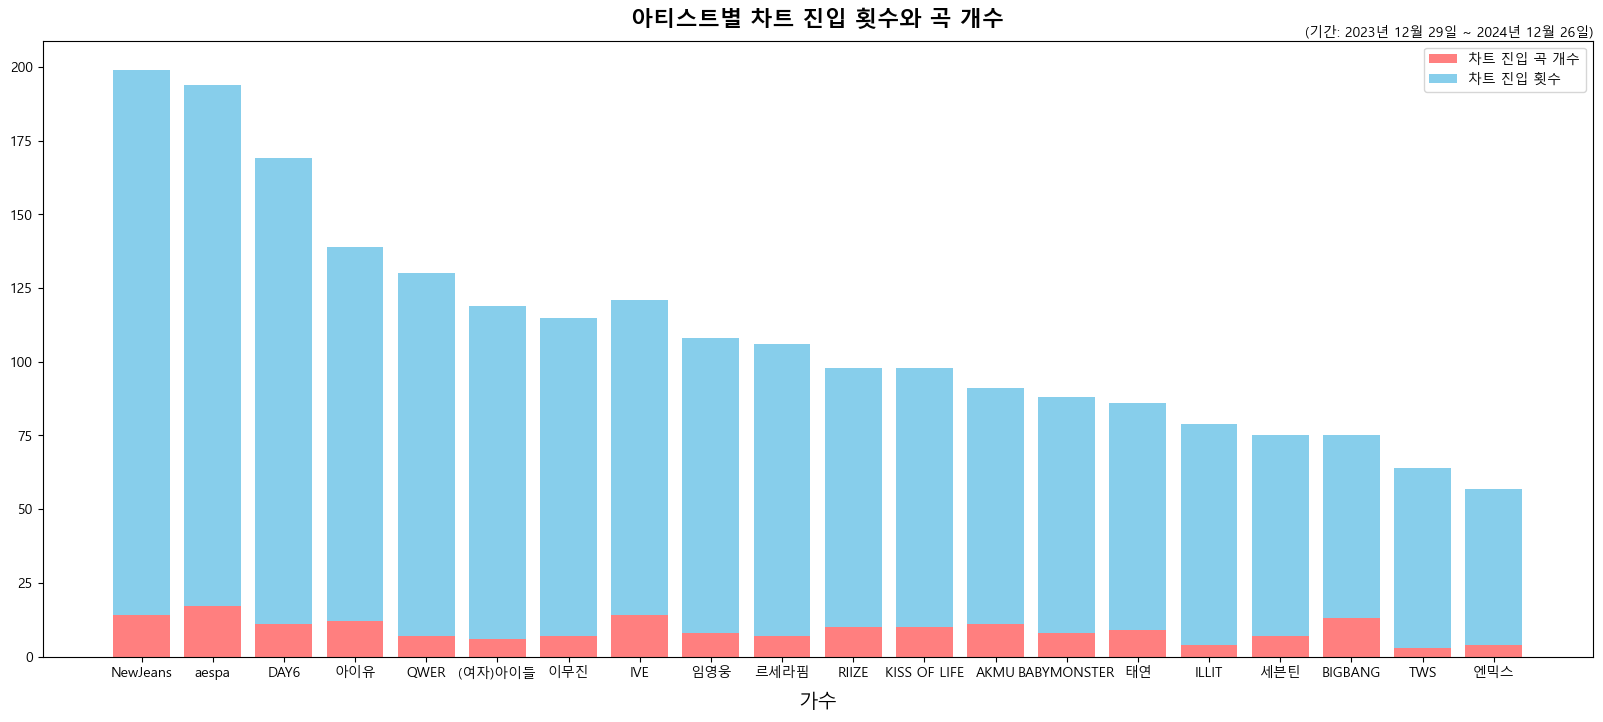

In [521]:
plt.figure(figsize=(20,8))

x = df_q95_cnt['가수']
y1 = df_q95_cnt['제목']
y2 = df_q95_cnt['차트 진입 횟수']

plt.bar(x, y1, label='차트 진입 곡 개수', color='red', alpha=0.5)
plt.bar(x, y2, bottom=y1, label='차트 진입 횟수', color='skyblue')
plt.xlabel('가수', fontsize=14, labelpad=10)

plt.legend(loc='best')

plt.text(20.4, 214, '(기간: 2023년 12월 29일 ~ 2024년 12월 26일)', ha='right', va='top')

plt.title("아티스트별 차트 진입 횟수와 곡 개수", fontsize=16, weight='bold', pad=10)
plt.show()

In [526]:
df_chart.query("가수 == 'NewJeans'").describe()

순위                            발매일      지난주 순위     차트 지속기간  \
count  185.00000                            185  185.000000  185.000000   
mean    23.32973  2023-12-04 10:38:16.216216320   18.864865   25.994595   
min      1.00000            2022-07-21 00:00:00    0.000000    1.000000   
25%      9.00000            2023-07-07 00:00:00    6.000000   12.000000   
50%     22.00000            2024-04-26 00:00:00   19.000000   24.000000   
75%     32.00000            2024-05-24 00:00:00   27.000000   39.000000   
max     98.00000            2024-06-21 00:00:00   79.000000   58.000000   
std     18.20608                            NaN   14.851369   16.309339   

                조회수          주차                            기준일      발매일로부터  
count  1.850000e+02  185.000000                            185  185.000000  
mean   1.626222e+06   27.189189  2024-07-05 07:47:01.621621504  213.881081  
min    3.036540e+05    1.000000            2024-01-04 00:00:00    4.000000  
25%    8.732730e+05   18.000000            2024-05-02 00:00:00   83.000000  
50%    1.220106e+06   27.000000            2024-07-04 00:00:00  181.000000  
75%    1.831396e+06   37.000000            2024-09-12 00:00:00  293.000000  
max    1.075587e+07   52.000000            2024-12-26 00:00:00  724.000000  
std    1.328109e+06   13.230067                            NaN  172.716584

In [527]:
df_chart.query("가수 == 'aespa'").describe()

순위                            발매일      지난주 순위     차트 지속기간  \
count  177.000000                            177  177.000000  177.000000   
mean    27.960452  2024-01-31 16:48:48.813559296   20.101695   20.887006   
min      1.000000            2021-05-17 00:00:00    0.000000    1.000000   
25%      7.000000            2023-11-08 00:00:00    3.000000    8.000000   
50%     17.000000            2024-05-13 00:00:00   11.000000   18.000000   
75%     44.000000            2024-05-26 00:00:00   31.000000   32.000000   
max     99.000000            2024-10-21 00:00:00   93.000000   57.000000   
std     27.562401                            NaN   22.184168   15.470232   

                조회수          주차                            기준일       발매일로부터  
count  1.770000e+02  177.000000                            177   177.000000  
mean   1.781475e+06   29.717514  2024-07-23 00:32:32.542372864   173.322034  
min    3.044060e+05    1.000000            2024-01-04 00:00:00     1.000000  
25%    6.838880e+05   21.000000            2024-05-23 00:00:00    59.000000  
50%    1.349286e+06   31.000000            2024-08-01 00:00:00   130.000000  
75%    2.032250e+06   41.000000            2024-10-10 00:00:00   220.000000  
max    8.798921e+06   52.000000            2024-12-26 00:00:00  1109.000000  
std    1.563098e+06   13.602280                            NaN   196.966290

In [528]:
df_chart.query("가수 == 'BIGBANG'").describe()

순위                            발매일      지난주 순위    차트 지속기간  \
count   62.000000                             62   62.000000  62.000000   
mean    75.903226  2014-01-26 21:17:25.161290240   46.822581  18.145161   
min     36.000000            2006-08-28 00:00:00    0.000000   1.000000   
25%     63.250000            2008-11-05 00:00:00    0.000000   5.000000   
50%     80.500000            2015-06-01 00:00:00   61.000000  18.500000   
75%     89.000000            2016-12-12 00:00:00   81.000000  27.000000   
max    100.000000            2022-04-04 00:00:00  100.000000  42.000000   
std     17.841478                            NaN   39.694540  12.586549   

                 조회수         주차                            기준일       발매일로부터  
count      62.000000  62.000000                             62    62.000000  
mean   461341.870968  41.290323  2024-10-12 00:46:27.096774144  3911.145161  
min    315921.000000   1.000000            2024-01-04 00:00:00   640.000000  
25%    371423.250000  33.250000            2024-08-16 18:00:00  2888.750000  
50%    421134.500000  48.000000            2024-11-28 00:00:00  3478.500000  
75%    525555.500000  50.000000            2024-12-12 00:00:00  5760.250000  
max    877828.000000  52.000000            2024-12-26 00:00:00  6646.000000  
std    128859.660007  13.196357                            NaN  1938.080323

---

In [322]:
df_q95_cnt.describe()

제목    차트 진입 횟수         비율
count  20.000   20.000000  20.000000
mean    9.100  101.450000   9.321500
std     3.712   37.315828   3.812005
min     3.000   53.000000   4.920000
25%     7.000   76.500000   6.840000
50%     8.500   93.500000   8.725000
75%    11.250  115.500000  11.360000
max    17.000  185.000000  20.970000

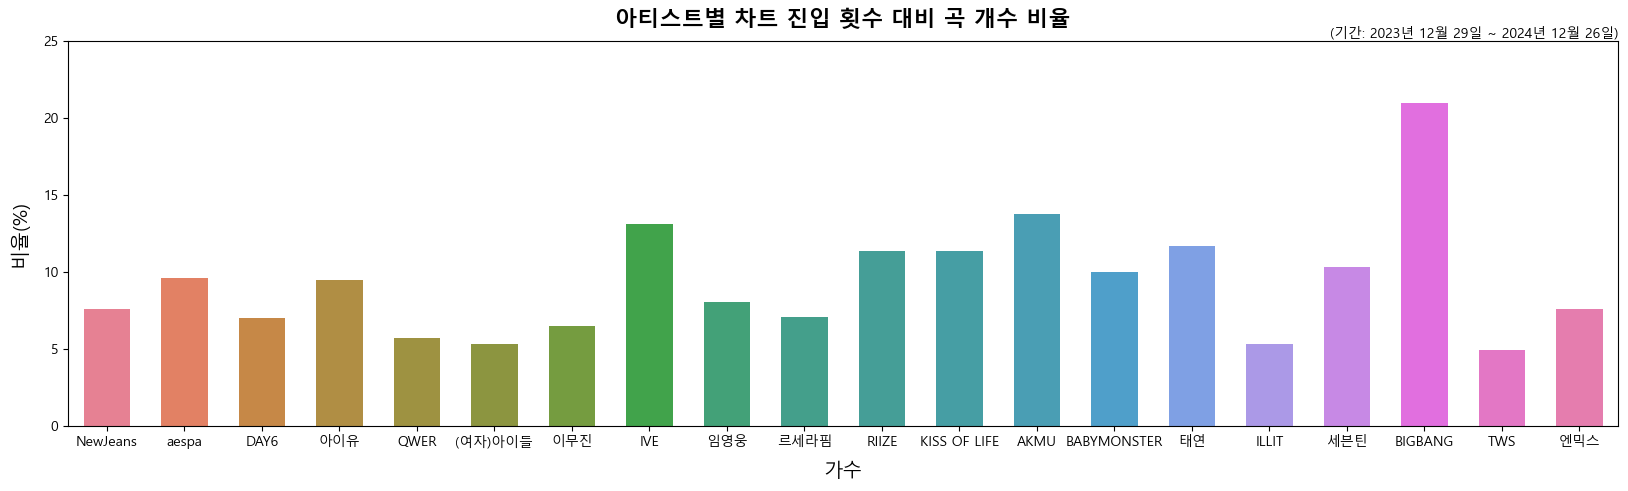

In [474]:
plt.figure(figsize=(20, 5))

cm = sns.color_palette('hls', len(df_q95_cnt))

ax = sns.barplot(data=df_q95_cnt, x='가수', y='비율', hue='가수', dodge=False, width=0.6)
ax.set_title('아티스트별 차트 진입 횟수 대비 곡 개수 비율', fontsize=16, weight='bold', pad=10)
ax.set_xlabel('가수', fontsize=14, labelpad=10)
ax.set_ylabel('비율(%)', fontsize=14, labelpad=10)
ax.set_ylim(0, 25)

plt.text(1.00, 1.035, '(기간: 2023년 12월 29일 ~ 2024년 12월 26일)', ha='right', va='top', transform=ax.transAxes)

plt.show()

---

**가수별 곡 조회수 합산**

In [554]:
df_ar_streaming = df.groupby('가수')[['조회수']].sum().sort_values('조회수', ascending=False).head()
df_ar_streaming['개수'] = [17, 14, 7, 6, 11]
#df_ar_streaming['평균'] = (df_ar_streaming['조회수'] / df_ar_streaming['개수']).astype(int)

df_ar_streaming

조회수  개수
가수                     
aespa     315321115  17
NewJeans  300851116  14
QWER      212395416   7
(여자)아이들   170392816   6
DAY6      166405017  11

In [555]:
df.query("가수 in @df_ar_streaming.index").groupby('가수')['제목'].nunique().mean()

11.0

In [381]:
df_ar_streaming5 = df.query("가수 in @df_ar_streaming.index").groupby(['가수', '제목'])[['조회수']].sum().sort_values(['가수', '조회수'], ascending=False).reset_index()
df_ar_streaming5

가수                                            제목        조회수
0      aespa                                     Supernova  104924689
1      aespa                                         Drama   67056751
2      aespa                                    Armageddon   60648534
3      aespa                                      Whiplash   49234408
4      aespa                                         Spicy   12192070
5      aespa                                  Live My Life   11008516
6      aespa                                      Hot Mess    2687118
7      aespa                                    Next Level    2361149
8      aespa                                       Flowers     859204
9      aespa                                       Kill It     804950
10     aespa                                  Set The Tone     758980
11     aespa                                 도깨비불 Illusion     715821
12     aespa  Regret of the Times (2024 aespa Remake Ver.)     556113
13     aespa                                Long Chat (#♥)     437292
14     aespa                           Spark (WINTER Solo)     410202
15     aespa                                      Licorice     360912
16     aespa                                 Better Things     304406
17      QWER                                          고민중독  106843938
18      QWER                                       내 이름 맑음   45636792
19      QWER                                          디스코드   39178245
20      QWER                              Harmony of Stars    8636671
21      QWER                                     FAKE IDOL    8387660
22      QWER                                         나의 슬픔    3319265
23      QWER                                       REBOUND     392845
24  NewJeans                                     How Sweet   77543655
25  NewJeans                                  Supernatural   60234106
26  NewJeans                                    Bubble Gum   55541207
27  NewJeans                                           ETA   31858313
28  NewJeans                                     Super Shy   27805650
29  NewJeans                                     Right Now   13209460
30  NewJeans                                           OMG   11461132
31  NewJeans                                     Attention    8295564
32  NewJeans                                         Ditto    7330634
33  NewJeans                                      Hype Boy    3298470
34  NewJeans                                     New Jeans    1832450
35  NewJeans                                        Cookie    1172421
36  NewJeans                                          Hurt     793542
37  NewJeans                                          ASAP     474512
38      DAY6                           Welcome to the Show   56185374
39      DAY6                                  HAPPY (Live)   46831487
40      DAY6                               Congratulations   15600351
41      DAY6                                         녹아내려요   12249454
42      DAY6                           Love me or Leave me   11827822
43      DAY6                                 한 페이지가 될 수 있게   11763086
44      DAY6                                           예뻤어    7076149
45      DAY6                                        Zombie    1386288
46      DAY6                                       그녀가 웃었다    1330782
47      DAY6                                            괴물    1177931
48      DAY6                                      아직 거기 살아     976293
49   (여자)아이들                                          Fate   93250227
50   (여자)아이들                                           클락션   27687003
51   (여자)아이들                                          Wife   19604692
52   (여자)아이들                                    Super Lady   18827846
53   (여자)아이들                                            퀸카    9709315
54   (여자)아이들                                        TOMBOY    1313733

In [598]:
a = (df_ar_streaming5.query("가수 == '(여자)아이들'").describe()).astype('int').reset_index()
b = (df_ar_streaming5.query("가수 == 'DAY6'").describe()).astype('int').reset_index()
c = (df_ar_streaming5.query("가수 == 'NewJeans'").describe()).astype('int').reset_index()
d = (df_ar_streaming5.query("가수 == 'QWER'").describe()).astype('int').reset_index()
e = (df_ar_streaming5.query("가수 == 'aespa'").describe()).astype('int').reset_index()

dff = pd.concat([a, b, c, d, e], axis=1)
dff.set_index('index', inplace=True)
dff.columns = ['(여자)아이들', 'DAY6', 'NewJeans', 'QWEr', 'aespa']
dff

(여자)아이들      DAY6  NewJeans       QWEr  \
index                                                                          
(count, count, count, count, count)         6        11        14          7   
(mean, mean, mean, mean, mean)       28398802  15127728  21489365   30342202   
(std, std, std, std, std)            33039526  18869147  25561189   38176892   
(min, min, min, min, min)             1313733    976293    474512     392845   
(25%, 25%, 25%, 25%, 25%)            11988947   1358535   2198955    5853462   
(50%, 50%, 50%, 50%, 50%)            19216269  11763086   9878348    8636671   
(75%, 75%, 75%, 75%, 75%)            25666425  13924902  30845147   42407518   
(max, max, max, max, max)            93250227  56185374  77543655  106843938   

                                         aespa  
index                                           
(count, count, count, count, count)         17  
(mean, mean, mean, mean, mean)        18548300  
(std, std, std, std, std)             31667604  
(min, min, min, min, min)               304406  
(25%, 25%, 25%, 25%, 25%)               556113  
(50%, 50%, 50%, 50%, 50%)               859204  
(75%, 75%, 75%, 75%, 75%)             12192070  
(max, max, max, max, max)            104924689

In [589]:
(df_ar_streaming5.query("가수 == '(여자)아이들'").describe()).astype('int').reset_index()

index       조회수
0  count         6
1   mean  28398802
2    std  33039526
3    min   1313733
4    25%  11988947
5    50%  19216269
6    75%  25666425
7    max  93250227

In [584]:
(df_ar_streaming5.query("가수 == 'DAY6'").describe()).astype('int')

조회수
count        11
mean   15127728
std    18869147
min      976293
25%     1358535
50%    11763086
75%    13924902
max    56185374

In [585]:
(df_ar_streaming5.query("가수 == 'NewJeans'").describe()).astype('int')

조회수
count        14
mean   21489365
std    25561189
min      474512
25%     2198955
50%     9878348
75%    30845147
max    77543655

In [586]:
(df_ar_streaming5.query("가수 == 'QWER'").describe()).astype('int')

조회수
count          7
mean    30342202
std     38176892
min       392845
25%      5853462
50%      8636671
75%     42407518
max    106843938

In [587]:
(df_ar_streaming5.query("가수 == 'aespa'").describe()).astype('int')

조회수
count         17
mean    18548300
std     31667604
min       304406
25%       556113
50%       859204
75%     12192070
max    104924689

In [433]:
ddd = []
l = list(df_ar_streaming5.가수.unique())

for artist in l:
    ddd.append(df_ar_streaming5[df_ar_streaming5['가수'] == artist].head(3))

df_ar_streaming3 = pd.concat(ddd)
df_ar_streaming3

가수                   제목        조회수
0      aespa            Supernova  104924689
1      aespa                Drama   67056751
2      aespa           Armageddon   60648534
17      QWER                 고민중독  106843938
18      QWER              내 이름 맑음   45636792
19      QWER                 디스코드   39178245
24  NewJeans            How Sweet   77543655
25  NewJeans         Supernatural   60234106
26  NewJeans           Bubble Gum   55541207
38      DAY6  Welcome to the Show   56185374
39      DAY6         HAPPY (Live)   46831487
40      DAY6      Congratulations   15600351
49   (여자)아이들                 Fate   93250227
50   (여자)아이들                  클락션   27687003
51   (여자)아이들                 Wife   19604692

<Figure size 1000x500 with 0 Axes>

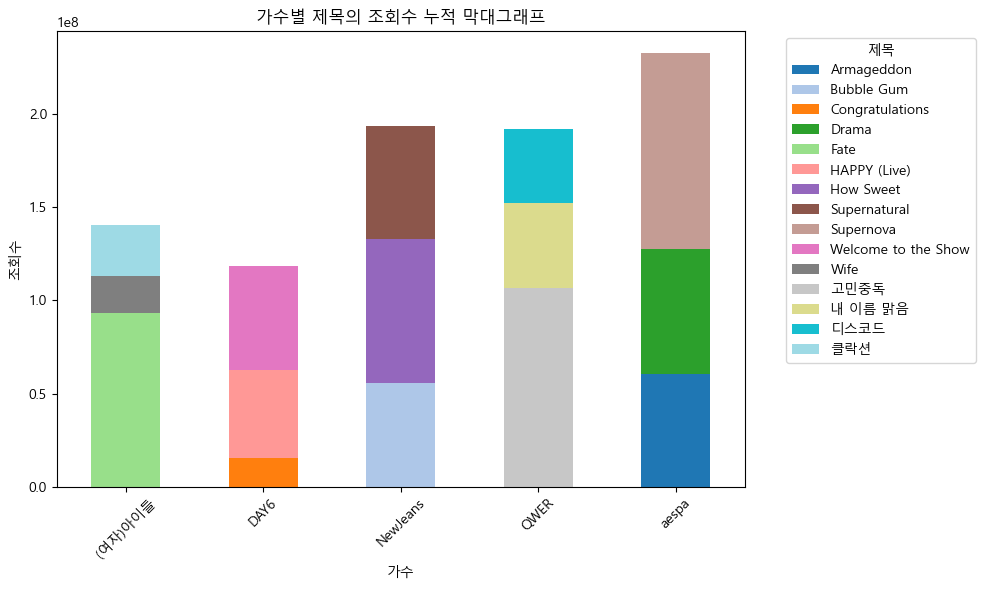

In [536]:
plt.figure(figsize=(10,5))

# 가수별로 '제목'의 조회수 누적
df_grouped = df_ar_streaming3.groupby(['가수', '제목'])['조회수'].sum().unstack()

# 막대그래프 그리기
ax = df_grouped.plot(kind='bar', stacked=True, figsize=(10, 6), colormap='tab20')

# 그래프 설정
plt.title('가수별 제목의 조회수 누적 막대그래프')
plt.xlabel('가수')
plt.ylabel('조회수')
plt.xticks(rotation=45)
plt.legend(title='제목', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()
plt.show()

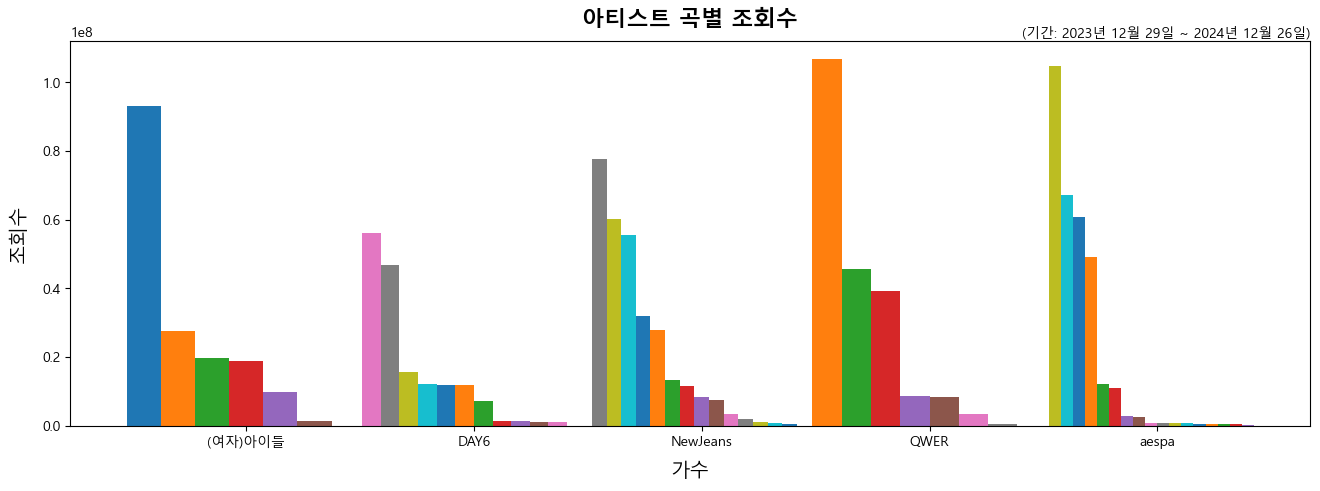

In [569]:
# 가수별 데이터 정리
grouped = df_ar_streaming5.groupby("가수")
artists = list(grouped.groups.keys())
num_artists = len(artists)

# x축 위치 지정
x = np.arange(len(artists))

fig, ax = plt.subplots(figsize=(16, 5))

bar_count = 0
for i, artist in enumerate(artists):
    subset = df_ar_streaming5[df_ar_streaming5["가수"] == artist]
    for j, (title, views) in enumerate(zip(subset["제목"], subset["조회수"])):
        ax.bar(x[i] + (j - len(subset)/2) * (width / len(subset)), views, width=width/len(subset), label=title)
        bar_count += 1
    
ax.set_title("아티스트 곡별 조회수", fontsize=16, weight='bold', pad=10)
ax.set_xticks(x)
ax.set_xticklabels(artists)
ax.set_xlabel('가수', fontsize=14, labelpad=10)
ax.set_ylabel("조회수", fontsize=14, labelpad=10)

plt.text(1.00, 1.035, '(기간: 2023년 12월 29일 ~ 2024년 12월 26일)', ha='right', va='top', transform=ax.transAxes)

plt.show()

C:\Users\m\AppData\Local\Temp\ipykernel_18396\3950537689.py:11: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  colors = plt.cm.get_cmap("tab20", len(df_ar_streaming3))


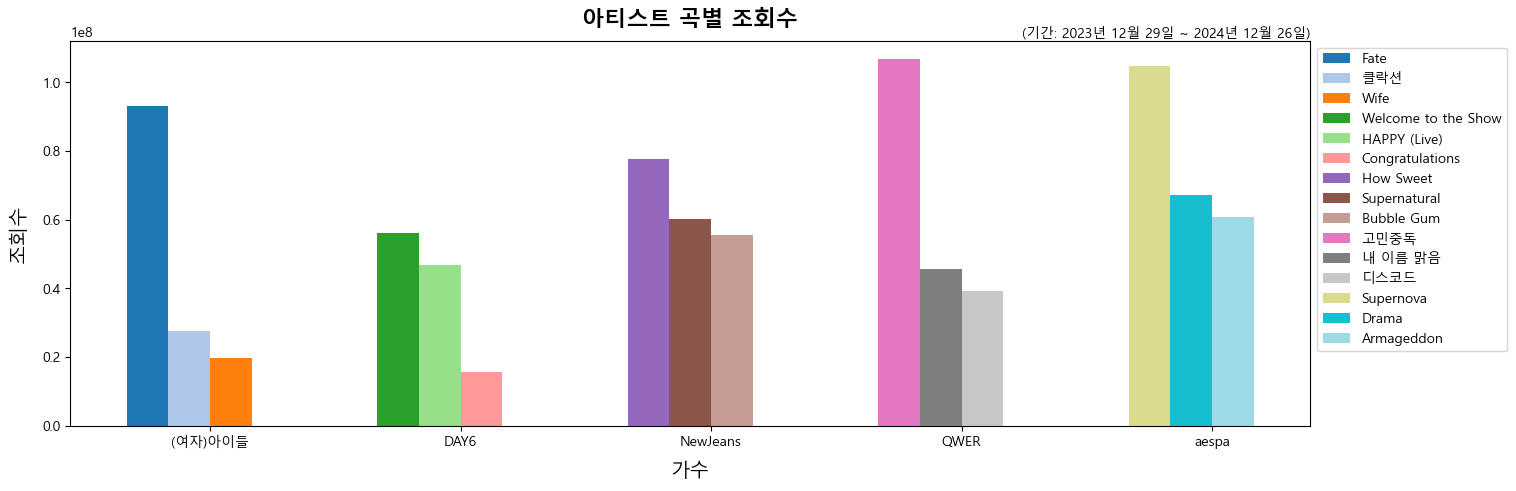

In [475]:
# 가수별 데이터 정리
grouped = df_ar_streaming3.groupby("가수")
artists = list(grouped.groups.keys())
num_artists = len(artists)
width = 0.5 

# x축 위치 지정
x = np.arange(len(artists))

# 색상 지정
colors = plt.cm.get_cmap("tab20", len(df_ar_streaming3))
color_list = [colors(i / len(df_ar_streaming3)) for i in range(len(df_ar_streaming3))]

fig, ax = plt.subplots(figsize=(16, 5))

bar_count = 0
for i, artist in enumerate(artists):
    subset = df_ar_streaming3[df_ar_streaming3["가수"] == artist]
    for j, (title, views) in enumerate(zip(subset["제목"], subset["조회수"])):
        ax.bar(x[i] + (j - len(subset)/2) * (width / len(subset)), views, width=width/len(subset), label=title, color=color_list[bar_count])
        bar_count += 1
    
ax.set_title("아티스트 곡별 조회수", fontsize=16, weight='bold', pad=10)
ax.set_xticks(x)
ax.set_xticklabels(artists)
ax.set_xlabel('가수', fontsize=14, labelpad=10)
ax.set_ylabel("조회수", fontsize=14, labelpad=10)

plt.text(1.00, 1.035, '(기간: 2023년 12월 29일 ~ 2024년 12월 26일)', ha='right', va='top', transform=ax.transAxes)

ax.legend(bbox_to_anchor=(1, 1))
plt.show()


---

In [666]:
df_dan = df.query("가수 in ['DAY6', 'aespa', 'NewJeans']").sort_values('가수')
df_dan

순위                   제목     가수        발매일  지난주 순위  차트 지속기간      조회수  주차  \
95  96                녹아내려요   DAY6 2024-09-02       0       15   317729  52   
37  38  Welcome to the Show   DAY6 2024-03-18      27        7   919800  18   
1    2         HAPPY (Live)   DAY6 2024-03-18       2       18  3165035  41   
92  93               Zombie   DAY6 2020-05-11      86        7   372856  40   
48  49  Love me or Leave me   DAY6 2020-05-11      51       22   632974  40   
..  ..                  ...    ...        ...     ...      ...      ...  ..   
11  12           Armageddon  aespa 2024-05-26      11       17  1439400  38   
92  93             Licorice  aespa 2024-05-15       0        1   360912  20   
70  71       Long Chat (#♥)  aespa 2024-05-14       0        1   437292  20   
64  65           Next Level  aespa 2021-05-17      74       55   462487  20   
1    2                Drama  aespa 2023-11-08       2        8  3339128   1   

          기준일  발매일로부터  
95 2024-12-26     115  
37 2024-05-02      45  
1  2024-10-10     206  
92 2024-10-03    1606  
48 2024-10-03    1606  
..        ...     ...  
11 2024-09-19     116  
92 2024-05-16       1  
70 2024-05-16       2  
64 2024-05-16    1095  
1  2024-01-04      57  

[520 rows x 10 columns]

In [676]:
df_dan.groupby('가수')[['제목']].value_counts()

가수        제목                                          
DAY6      Welcome to the Show                             41
          HAPPY (Live)                                    29
          Congratulations                                 24
          Love me or Leave me                             23
          녹아내려요                                           15
          한 페이지가 될 수 있게                                    9
          예뻤어                                              5
          Zombie                                           4
          괴물                                               3
          그녀가 웃었다                                          3
          아직 거기 살아                                         2
NewJeans  Bubble Gum                                      32
          How Sweet                                       31
          ETA                                             30
          Super Shy                                       27
          Supernatural        

---

**DAY6(데이식스)**
- `len(df_day6['제목'].unique())` => 11개

In [115]:
df_day6 = df_q98.query("가수 in 'DAY6(데이식스)'")[['제목', '조회수', '지난주 순위', '차트 지속기간', '발매일']].sort_values(by='제목')
df_day6

제목      조회수  지난주 순위  차트 지속기간        발매일
42  Congratulations   760087      52       18 2015-09-06
82  Congratulations   414278       0        1 2015-09-06
62  Congratulations   539637      83        2 2015-09-06
66  Congratulations   488966      63        3 2015-09-06
61  Congratulations   482990      67        4 2015-09-06
..              ...      ...     ...      ...        ...
38    한 페이지가 될 수 있게   899757      46       46 2019-07-15
8     한 페이지가 될 수 있게  1681489       9       53 2019-07-15
45    한 페이지가 될 수 있게   805259       0       45 2019-07-15
17    한 페이지가 될 수 있게  1164062      26       48 2019-07-15
9     한 페이지가 될 수 있게  1580733      11       51 2019-07-15

[158 rows x 5 columns]

In [123]:
df_day6.info()

<class 'pandas.core.frame.DataFrame'>
Index: 158 entries, 42 to 9
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype          
---  ------   --------------  -----          
 0   제목       158 non-null    object         
 1   조회수      158 non-null    int32          
 2   지난주 순위   158 non-null    int32          
 3   차트 지속기간  158 non-null    int32          
 4   발매일      158 non-null    datetime64[ns] 
 5   발매 후로부터  158 non-null    timedelta64[ns]
dtypes: datetime64[ns](1), int32(3), object(1), timedelta64[ns](1)
memory usage: 6.8+ KB


In [129]:
specific_date = pd.to_datetime('2024-12-26')

sub = specific_date - df_day6['발매일']

df_day6['발매 후로부터'] = sub.dt.days
df_day6

제목      조회수  지난주 순위  차트 지속기간        발매일  발매 후로부터
42  Congratulations   760087      52       18 2015-09-06     3399
82  Congratulations   414278       0        1 2015-09-06     3399
62  Congratulations   539637      83        2 2015-09-06     3399
66  Congratulations   488966      63        3 2015-09-06     3399
61  Congratulations   482990      67        4 2015-09-06     3399
..              ...      ...     ...      ...        ...      ...
38    한 페이지가 될 수 있게   899757      46       46 2019-07-15     1991
8     한 페이지가 될 수 있게  1681489       9       53 2019-07-15     1991
45    한 페이지가 될 수 있게   805259       0       45 2019-07-15     1991
17    한 페이지가 될 수 있게  1164062      26       48 2019-07-15     1991
9     한 페이지가 될 수 있게  1580733      11       51 2019-07-15     1991

[158 rows x 6 columns]

In [135]:
df_day6_g = df_day6.groupby('제목')[['차트 지속기간']].max()

df_day6_g['누적 조회수'] = df_day6.groupby('제목')[['조회수']].sum()
df_day6_g['발매일'] = df_day6.groupby('제목')[['발매 후로부터']].max()

df_day6_g

차트 지속기간    누적 조회수   발매일
제목                                          
Congratulations           24  15600351  3399
HAPPY (Live)              29  46831487   283
Love me or Leave me       23  11827822  1690
Welcome to the Show       41  56185374   283
Zombie                     8   1386288  1690
괴물                         3   1177931   115
그녀가 웃었다                    3   1330782   115
녹아내려요                     15  12249454   115
아직 거기 살아                   2    976293   115
예뻤어                       34   7076149  2881
한 페이지가 될 수 있게             53  11763086  1991

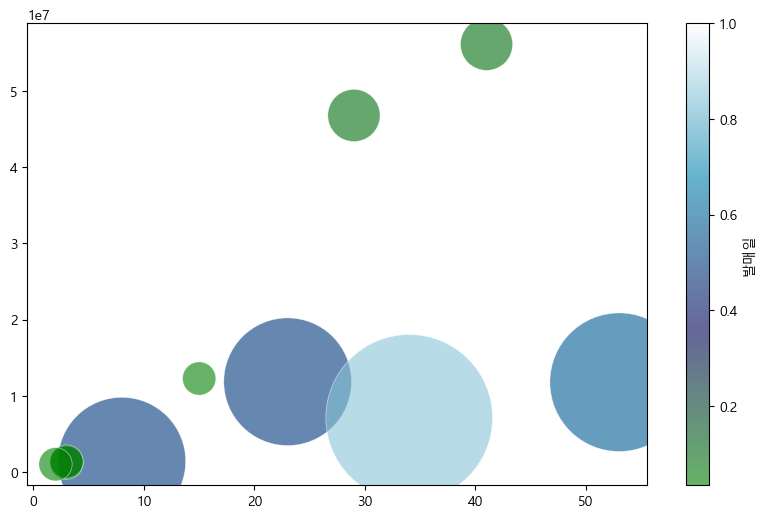

In [140]:
x = df_day6_g['차트 지속기간']
y = df_day6_g['누적 조회수']
sizes = df_day6_g['발매일'] * 5
alpha_values = df_day6_g['발매일'] / df_day6_g['발매일'].max()

plt.figure(figsize=(10,6))
scatter = plt.scatter(
    x, y, s=sizes, c=alpha_values, alpha=0.6, cmap='ocean', edgecolors='w', linewidth=0.5
)

plt.colorbar(scatter, label='발매일')

plt.show()

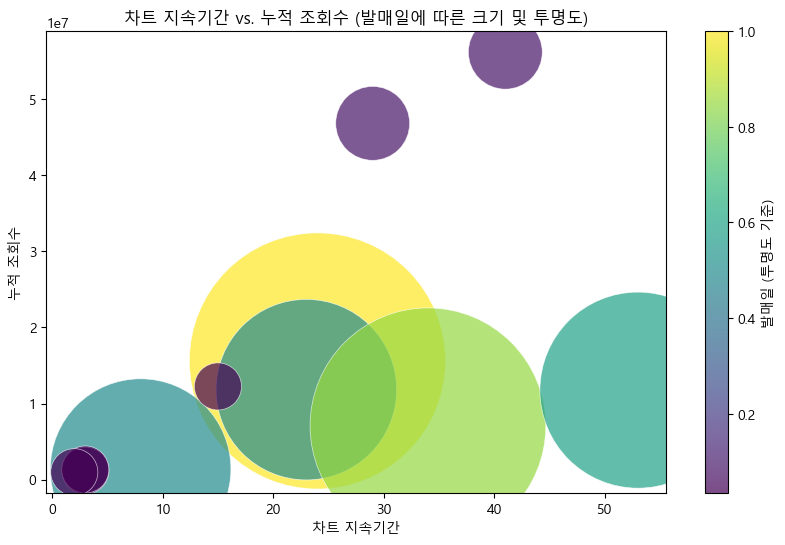

In [136]:
import matplotlib.pyplot as plt

# df_day6_g 데이터프레임을 불러와야 합니다
# df_day6_g = ...

# x, y, 크기, alpha 설정
x = df_day6_g['차트 지속기간']
y = df_day6_g['누적 조회수']
sizes = df_day6_g['발매일'] * 10  # 크기 조정 (발매일에 비례, 크기를 적당히 조절)
alpha_values = df_day6_g['발매일'] / df_day6_g['발매일'].max()  # alpha는 발매일 비율로 설정

# 산점도 그리기
plt.figure(figsize=(10, 6))
scatter = plt.scatter(x, y, s=sizes, c=alpha_values, alpha=0.7, cmap='viridis', edgecolors='w', linewidth=0.5)

# x축, y축 레이블 설정
plt.xlabel('차트 지속기간')
plt.ylabel('누적 조회수')

# 제목 설정
plt.title('차트 지속기간 vs. 누적 조회수 (발매일에 따른 크기 및 투명도)')

# 범례
plt.colorbar(scatter, label='발매일 (투명도 기준)')

# 그래프 출력
plt.show()

---

**NewJeans**

In [149]:
df_newjeans = df_q98.query("가수 == 'NewJeans'")[['제목', '조회수', '지난주 순위', '차트 지속기간', '조회수']]
df_newjeans[:2]

순위         제목        가수        발매일  지난주 순위  순위 지속기간   주간 조회수  주차
14  15        ETA  NewJeans 2023-07-21      18       23  1584302   1
23  24  Super Shy  NewJeans 2023-07-07      15       26  1303054   1

In [150]:
#뉴진스 describe()
df_newjeans.describe()

순위                            발매일      지난주 순위     순위 지속기간  \
count  185.00000                            185  185.000000  185.000000   
mean    23.32973  2023-12-04 10:38:16.216216320   18.864865   25.994595   
min      1.00000            2022-07-21 00:00:00    0.000000    1.000000   
25%      9.00000            2023-07-07 00:00:00    6.000000   12.000000   
50%     22.00000            2024-04-26 00:00:00   19.000000   24.000000   
75%     32.00000            2024-05-24 00:00:00   27.000000   39.000000   
max     98.00000            2024-06-21 00:00:00   79.000000   58.000000   
std     18.20608                            NaN   14.851369   16.309339   

             주간 조회수          주차  
count  1.850000e+02  185.000000  
mean   1.626222e+06   27.189189  
min    3.036540e+05    1.000000  
25%    8.732730e+05   18.000000  
50%    1.220106e+06   27.000000  
75%    1.831396e+06   37.000000  
max    1.075587e+07   52.000000  
std    1.328109e+06   13.230067

In [168]:
df_newjeans[:2]

순위         제목        가수        발매일  지난주 순위  순위 지속기간   주간 조회수  주차
14  15        ETA  NewJeans 2023-07-21      18       23  1584302   1
23  24  Super Shy  NewJeans 2023-07-07      15       26  1303054   1

**a. 뉴진스 차트 진입 주차**
- 1년 동안 매주(총 52주) 차트에 진입
- 매우 활발하게 활동을 지속한 것으로 확인됨
- 지속적으로 강력하게 대중의 사랑을 받아왔으며, 곡의 유연성과 팬층의 두터움을 보여줌
- 여러 곡이 순차적으로 차트에 진입하며 뉴진스의 음악적 스타일이 점차 확립되었음
- 뉴진스의 음악이 단기적인 유행을 넘어서, 오랫동안 지속적인 사랑을 받을 수 있는 가능성이 보임

In [196]:
newjeans_week = df_newjeans.주차.unique()
newjeans_week

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51,
       52])

**b. 스트리밍 상위 5개 곡**
- `len(df_newjeans.제목.unique())` => 14
    - 차트에 오른 뉴진스 곡은 총 14개
- How Sweet이 가장 많은 주간 조회수를 기록하며, 대중들이 가장 많이 들었다는 것 알 수 있음
- Supernatural, Bubble Gum, ETA, Super Shy가 뒤를 이으며, 뉴진스의 다양한 음악 스타일이 대중에게 어필된 것으로 보임
- 뉴진스가 여러 스타일을 시도하면서도 대부분의 곡에서 성공을 거두었다는 점에서 큰 의미가 있음

In [192]:
newjeans_streaming5 = df_newjeans.groupby('제목')[['주간 조회수']].sum().sort_values(by='주간 조회수', ascending=False)[:5]
newjeans_streaming5

주간 조회수
제목                    
How Sweet     77543655
Supernatural  60234106
Bubble Gum    55541207
ETA           31858313
Super Shy     27805650

**c. 곡별 차트 진입 상위 5곡**
- Bubble Gum과 How Sweet이 가장 많이 차트에 진입한 곡으로, 두 곡은 팬들 사이에서 꾸준히 사랑받고 있음
- ETA, Super Shy, Supernatural도 상위권에 위치하며, 다양한 곡들이 지속적으로 차트에 머물며 뉴진스의 인기를 증명

In [197]:
newjeans_title5 = df_newjeans.제목.value_counts()[:5]
newjeans_title5

제목
Bubble Gum      32
How Sweet       31
ETA             30
Super Shy       27
Supernatural    27
Name: count, dtype: int64

**d. 주차별로 가장 높은 순위를 기록한 곡의 횟수**
- Supernatural이 가장 많이 주차별로 높은 순위를 기록(27번)하며, 뉴진스의 대표곡 중 하나로 자리 잡음
- 이는 그만큼 팬들뿐만 아니라 대중적인 반응을 이끌어냈다는 점에서 중요한 의미를 지님
- Attention, Bubble Gum, How Sweet도 각가 4번씩 높은 순위를 기록하며, 꾸준한 인기를 끌었음

In [ ]:
a = df_newjeans.loc[df_newjeans.groupby('주차')['순위'].idxmin()]
newjeans_title = a.groupby('제목')[['제목']].count()
newjeans_title

제목
제목              
Attention      4
Bubble Gum     4
ETA            5
How Sweet      4
Super Shy      8
Supernatural  27

**e. 주차별로 가장 높은 순위를 기록한 곡의 최종 순위**
- Supernatural이 가장 여러 차트에서 1위를 기록한 것을 제외하고, How Sweet, Bubble Gum, Super Shy 등의 곡들은 상대적으로 상위권에서 떨어짐
Super Shy는 8번에 걸쳐 가장 높은 순위를 기록하면서도 그 순위가 20위로 다소 낮다는 점에서 다른 곡에 비해 반응이 떨어지는 경향을 보임
- ETA는 상대적으로 더 낮은 15위로 고정되어 있는 경향을 보였지만, 여전히 높은 순위를 기록

In [209]:
newjeans_rank = a.groupby('제목')[['순위']].min()
newjeans_rank

순위
제목              
Attention     23
Bubble Gum     1
ETA           15
How Sweet      1
Super Shy     20
Supernatural   1

**f. Supernatural**
- 42주차부터 하락세를 보임
- 42주차까지는 항상 TOP10을 유지

In [225]:
supernatural = df_newjeans.query("제목 == 'Supernatural'")
supernatural

순위            제목        가수        발매일  지난주 순위  순위 지속기간   주간 조회수  주차
2502   3  Supernatural  NewJeans 2024-06-21       0        1  4606649  26
2601   2  Supernatural  NewJeans 2024-06-21       3        2  4143627  27
2700   1  Supernatural  NewJeans 2024-06-21       2        3  4572712  28
2800   1  Supernatural  NewJeans 2024-06-21       1        4  3773359  29
2900   1  Supernatural  NewJeans 2024-06-21       1        5  3632718  30
3000   1  Supernatural  NewJeans 2024-06-21       1        6  3463061  31
3100   1  Supernatural  NewJeans 2024-06-21       1        7  2909586  32
3201   2  Supernatural  NewJeans 2024-06-21       1        8  2780876  33
3301   2  Supernatural  NewJeans 2024-06-21       2        9  2528271  34
3401   2  Supernatural  NewJeans 2024-06-21       2       10  2312288  35
3502   3  Supernatural  NewJeans 2024-06-21       2       11  2169602  36
3605   6  Supernatural  NewJeans 2024-06-21       3       12  1996652  37
3704   5  Supernatural  NewJeans 2024-06-21       6       13  1865000  38
3807   8  Supernatural  NewJeans 2024-06-21       5       14  1840083  39
3906   7  Supernatural  NewJeans 2024-06-21       8       15  1696694  40
4006   7  Supernatural  NewJeans 2024-06-21       7       16  1651904  41
4108   9  Supernatural  NewJeans 2024-06-21       7       17  1573401  42
4213  14  Supernatural  NewJeans 2024-06-21       9       18  1465389  43
4315  16  Supernatural  NewJeans 2024-06-21      14       19  1453194  44
4417  18  Supernatural  NewJeans 2024-06-21      16       20  1371881  45
4517  18  Supernatural  NewJeans 2024-06-21      18       21  1309495  46
4617  18  Supernatural  NewJeans 2024-06-21      18       22  1308906  47
4721  22  Supernatural  NewJeans 2024-06-21      18       23  1245796  48
4819  20  Supernatural  NewJeans 2024-06-21      22       24  1232985  49
4922  23  Supernatural  NewJeans 2024-06-21      20       25  1170672  50
5021  22  Supernatural  NewJeans 2024-06-21      23       26  1104876  51
5123  24  Supernatural  NewJeans 2024-06-21      22       27  1054429  52

**뉴진스의 차트 성과에 대한 종합적 분석**
1. 지속적인 차트 진입과 인기 유지<br>
뉴진스는 52주 동안 매주 차트에 진입했다. 즉, 1년 동안 꾸준히 대중으로부터 사랑을 받았다는 것을 알 수 있다. 이는 단기적인 인기를 넘어서, 지속적으로 대중적인 반응을 얻고 있다는 증거이다.

2. 스트리밍 상위 곡들의 강력한 인기<br>
가장 많이 스트리밍된 상위 5곡은 How Sweet, Supernatural, Bubble Gum, ETA, Super Shy이다. 그 중 How Sweet은 77,543,655로 가장 높은 주간 조회수를 기록하며 스트리밍에서 압도적인 인기를 끌었다. 특히 Supernatural은 주간 조회수뿐만 아니라 차트에서 27번이나 진입한 곡으로, 16주차 동안 Top10을 유지함으로써 뉴진스의 대표적인 히트곡으로 자리잡았다.

---

# 연간

In [35]:
df_duration = df.groupby('제목')[['차트 지속기간']].max().sort_values('차트 지속기간', ascending=False).head(10).reset_index()    #제목별 누적 순위 지속시간 상위 10곡
df_streaming = df.groupby('제목')[['조회수']].sum().sort_values('조회수', ascending=False).head(10).reset_index() #제목별 누적 조회수 상위 10곡

**누적 차트 지속기간 상위 10곡**

In [36]:
df_duration

제목  차트 지속기간
0                                Kill This Love       60
1         모든 날, 모든 순간 (Every day, Every Moment)       59
2                                     Attention       58
3                                블루밍 (Blueming)       58
4  다정히 내 이름을 부르면 (If you lovingly call my name)       58
5                                          2002       58
6                      흔들리는 꽃들 속에서 네 샴푸향이 느껴진거야       57
7                                         Ditto       57
8                  마지막처럼 (As If It's Your Last)       57
9                                    Next Level       57

**누적 조회수 상위 10곡**

In [90]:
df_streaming

제목        조회수
0           APT.  110493800
1           고민중독  106843938
2      Supernova  104924689
3           Fate   93250227
4       Magnetic   93209872
5      How Sweet   77543655
6  Love wins all   70233892
7     plot twist   67884481
8          Drama   67056751
9          To. X   64244800

In [117]:
a = df_streaming.sort_values('제목').reset_index()[['제목', '조회수']]
b = df.query("제목 in @df_streaming.제목")[['제목', '가수']].sort_values('제목').drop_duplicates()[['가수']].reset_index()[['가수']]

df_streaming = pd.concat([a, b], axis=1).sort_values('조회수', ascending=False)
df_streaming

제목        조회수           가수
0           APT.  110493800  로제 & 브루노 마스
9           고민중독  106843938         QWER
6      Supernova  104924689        aespa
2           Fate   93250227      (여자)아이들
5       Magnetic   93209872        ILLIT
3      How Sweet   77543655     NewJeans
4  Love wins all   70233892          아이유
8     plot twist   67884481          TWS
1          Drama   67056751        aespa
7          To. X   64244800           태연

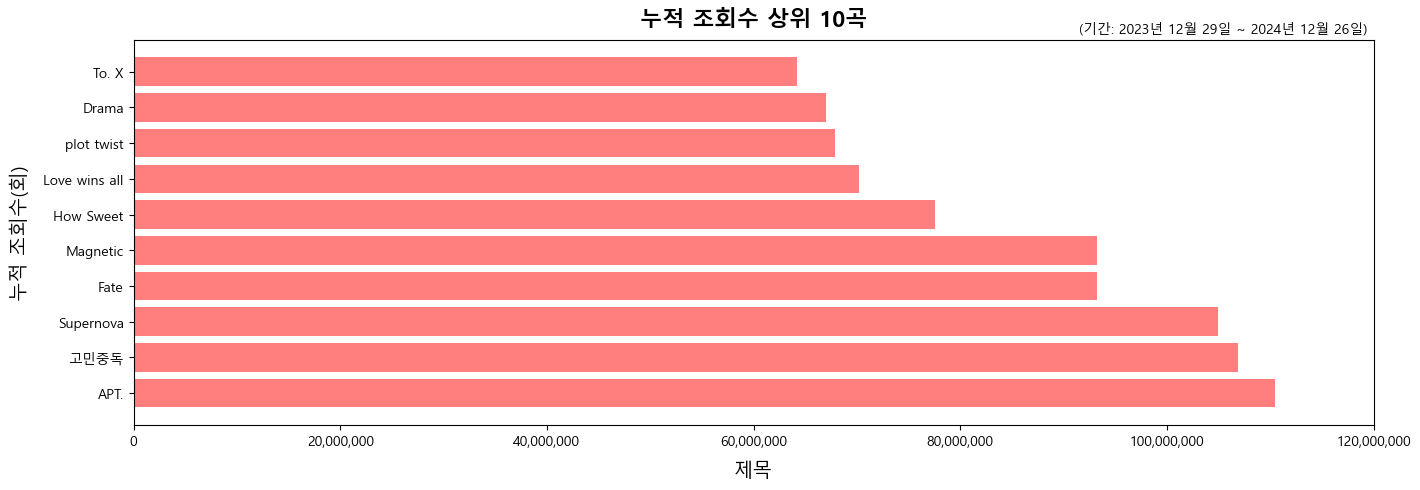

In [480]:
import matplotlib.ticker as mticker

plt.figure(figsize=(16,5))

plt.barh(df_streaming['제목'], df_streaming['조회수'], color='red', alpha=0.5)

plt.title("누적 조회수 상위 10곡", fontsize=16, weight='bold', pad=10)
plt.xlabel('제목', fontsize=14, labelpad=10)
plt.xlim(0, 120000000)
plt.ylabel('누적 조회수(회)', fontsize=14, labelpad=10)

# y축 숫자 천단위 콤마 적용
plt.gca().xaxis.set_major_formatter(mticker.FuncFormatter(lambda x, _: f'{int(x):,}'))

# 그래프 우측 상단 살짝 위에 '안녕하세요' 추가
max_x = df_streaming['조회수'].max()  # 최대 조회수 값
plt.text(max_x-19000000, len(df_streaming), '(기간: 2023년 12월 29일 ~ 2024년 12월 26일)', va='bottom')

plt.show()

**차트에 가장 많이 진입한 노래**

In [92]:
a = df.groupby('제목')[['제목']].count()
a.columns = ['진입 횟수']

a = a.sort_values('진입 횟수', ascending=False).head(10).reset_index()
a = a.sort_values('제목')

a

제목  진입 횟수
5                Drama     45
4                 Fate     46
7        Heavenly fate     44
1        Love wins all     49
8               MANIAC     44
2  Rhapsody of Sadness     47
3                To. X     47
9     a sad invitation     42
6                  晩餐歌     44
0                 에피소드     50

---

In [252]:
# 주차별 기준 날짜 설정 (1주차: 2024-01-04, 이후 주차마다 7일씩 증가)
df["기준일"] = pd.to_datetime("2024-01-04") + pd.to_timedelta((df["주차"] - 1) * 7, unit="D")

# "발매 후로부터" 계산 (기준일 - 발매일의 일수만 추출)
df["발매일로부터"] = (df["기준일"] - df["발매일"]).dt.days

df.describe()

순위                            발매일       지난주 순위      차트 지속기간  \
count  5200.000000                           5200  5200.000000  5200.000000   
mean     50.500000  2022-05-13 06:26:51.692307712    37.184808    16.010577   
min       1.000000            1984-11-29 00:00:00     0.000000     1.000000   
25%      25.750000            2023-04-20 00:00:00     8.000000     4.000000   
50%      50.500000            2024-01-16 00:00:00    34.000000    12.000000   
75%      75.250000            2024-05-05 00:00:00    62.000000    24.000000   
max     100.000000            2024-12-16 00:00:00   100.000000    60.000000   
std      28.868846                            NaN    30.309271    14.061569   

                조회수           주차                  기준일        발매일로부터  
count  5.200000e+03  5200.000000                 5200   5200.000000  
mean   9.184175e+05    26.500000  2024-06-30 12:00:00    779.231346  
min    2.821010e+05     1.000000  2024-01-04 00:00:00    -79.000000  
25%    4.292890e+05    13.750000  2024-04-02 06:00:00     48.000000  
50%    6.392670e+05    26.500000  2024-06-30 12:00:00    132.000000  
75%    1.046077e+06    39.250000  2024-09-27 18:00:00    388.250000  
max    2.525913e+07    52.000000  2024-12-26 00:00:00  14637.000000  
std    9.745173e+05    15.009774                  NaN   1680.328586

In [253]:
df_chart = df.query("발매일로부터 > 0").sort_values('제목')

---

In [482]:
df_title = df_chart.groupby('제목')[['제목']].count().rename(columns={'제목':'횟수'}).reset_index().sort_values('제목')

df_title

제목  횟수
0                          17   1
1            1조  LEE CHANHYUK   4
2                        2002   6
3                          3D   7
4                         3am   1
..                        ...  ..
726                        혜성   1
727                    후라이의 꿈  33
728  흔들리는 꽃들 속에서 네 샴푸향이 느껴진거야   5
729                        희재   3
730        흰수염고래 (Blue Whale)   1

[731 rows x 2 columns]

In [483]:
aa = list(df_chart.groupby("제목")[['차트 지속기간']].max()['차트 지속기간'])
bb = list(df_chart.groupby("제목")[['발매일로부터']].max()['발매일로부터'])
cc = list(df_chart.groupby("제목")[['조회수']].sum()['조회수'])

df_title['지속기간'] = aa
df_title['발매일로부터'] = bb
df_title['누적 조회수'] = cc

df_title

제목  횟수  지속기간  발매일로부터    누적 조회수
0                          17   1     1       9    370621
1            1조  LEE CHANHYUK   4     4      25   1983019
2                        2002   6    58    2375   2394735
3                          3D   7    20     139   3689399
4                         3am   1     1       7    529150
..                        ...  ..   ...     ...       ...
726                        혜성   1     1    6985    376659
727                    후라이의 꿈  33    52     360  35044967
728  흔들리는 꽃들 속에서 네 샴푸향이 느껴진거야   5    57    1693   1920762
729                        희재   3    27    7915   1942735
730        흰수염고래 (Blue Whale)   1     1    4765    379031

[731 rows x 5 columns]

In [484]:
df_title.describe()

횟수        지속기간        발매일로부터        누적 조회수
count  731.000000  731.000000    731.000000  7.310000e+02
mean     7.103967   16.532148   1196.506156  6.523221e+06
std      8.789167   16.303710   2044.453208  1.358797e+07
min      1.000000    1.000000      1.000000  3.001880e+05
25%      2.000000    3.000000     30.500000  7.425955e+05
50%      3.000000   10.000000    181.000000  1.814799e+06
75%      9.000000   26.000000   1451.500000  5.349300e+06
max     50.000000   60.000000  14637.000000  1.104938e+08

In [485]:
df_title95 = df_title[df_title['횟수'] >= df_title['횟수'].quantile(0.95)]
df_title95.head()

제목  횟수  지속기간  발매일로부터    누적 조회수
28         Armageddon  31    31     214  60648534
44   Beautiful Things  39    39     308  32238926
59         Bubble Gum  32    32     223  55541207
77   Closely Far Away  30    35    1218  15609953
104             Drama  45    52     365  67056751

In [486]:
df_chart_con = df_chart.query("제목 in @df_title95.제목").sort_values(['제목', '주차'])

# '연속' 컬럼 추가
df_chart_con['연속'] = 0  # 기본값을 0으로 설정

for i in range(1, len(df_chart_con)):
    if df_chart_con['주차'].iloc[i] == df_chart_con['주차'].iloc[i-1] + 1:  # 이전 주차 값과 연속될 경우
        df_chart_con['연속'].iloc[i] = df_chart_con['연속'].iloc[i-1] + 1  # 이전 연속 값에서 +1
    else:
        df_chart_con['연속'].iloc[i] = 0  # 연속되지 않으면 0으로 초기화

C:\Users\m\AppData\Local\Temp\ipykernel_18396\1889818992.py:8: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  df_chart_con['연속'].iloc[i] = df_chart_con['연속'].iloc[i-1] + 1  # 이전 연속 값에서 +1
C:\Users\m\AppData\Local\Temp\ipykernel_18396\18898189

In [487]:
df_chart_con.head()

순위          제목     가수        발매일  지난주 순위  차트 지속기간      조회수  주차        기준일  \
3   4  Armageddon  aespa 2024-05-26       0        1  3959482  22 2024-05-30   
2   3  Armageddon  aespa 2024-05-26       4        2  4883159  23 2024-06-06   
3   4  Armageddon  aespa 2024-05-26       3        3  4033897  24 2024-06-13   
3   4  Armageddon  aespa 2024-05-26       4        4  3581192  25 2024-06-20   
5   6  Armageddon  aespa 2024-05-26       4        5  3170232  26 2024-06-27   

   발매일로부터  연속  
3       4   0  
2      11   1  
3      18   2  
3      25   3  
5      32   4

In [488]:
df_chart_con.describe()

순위                            발매일       지난주 순위      차트 지속기간  \
count  1383.000000                           1383  1383.000000  1383.000000   
mean     25.663774  2023-12-07 05:54:00.780911104    23.697758    23.111352   
min       1.000000            2021-08-26 00:00:00     0.000000     1.000000   
25%      11.500000            2023-10-27 00:00:00    10.000000    13.000000   
50%      23.000000            2024-01-22 00:00:00    21.000000    23.000000   
75%      36.000000            2024-04-01 00:00:00    34.000000    32.000000   
max     100.000000            2024-06-21 00:00:00   100.000000    52.000000   
std      18.529451                            NaN    17.965227    12.879910   

                조회수           주차                            기준일       발매일로부터  \
count  1.383000e+03  1383.000000                           1383  1383.000000   
mean   1.409120e+06    27.614606  2024-07-08 07:15:13.665943296   214.056399   
min    2.941150e+05     1.000000            2024-01-04 00:00:00     2.000000   
25%    8.238575e+05    17.000000            2024-04-25 00:00:00   101.500000   
50%    1.104148e+06    28.000000            2024-07-11 00:00:00   176.000000   
75%    1.610954e+06    39.000000            2024-09-26 00:00:00   259.500000   
max    1.075587e+07    52.000000            2024-12-26 00:00:00  1218.000000   
std    9.987715e+05    13.426371                            NaN   199.532481   

                연속  
count  1383.000000  
mean     16.067245  
min       0.000000  
25%       6.000000  
50%      15.000000  
75%      24.000000  
max      49.000000  
std      11.542809

In [489]:
df_chart_con75 = df_chart_con[df_chart_con['연속'] >= df_chart_con['연속'].quantile(0.75)]
df_chart_con75

순위          제목     가수        발매일  지난주 순위  차트 지속기간      조회수  주차        기준일  \
18  19  Armageddon  aespa 2024-05-26      19       25  1229839  46 2024-11-14   
19  20  Armageddon  aespa 2024-05-26      19       26  1185093  47 2024-11-21   
26  27  Armageddon  aespa 2024-05-26      20       27  1205160  48 2024-11-28   
25  26  Armageddon  aespa 2024-05-26      27       28  1118970  49 2024-12-05   
24  25  Armageddon  aespa 2024-05-26      26       29  1082708  50 2024-12-12   
..  ..         ...    ...        ...     ...      ...      ...  ..        ...   
40  41      후라이의 꿈   AKMU 2023-08-21      49       48   778525  29 2024-07-18   
42  43      후라이의 꿈   AKMU 2023-08-21      41       49   726345  30 2024-07-25   
33  34      후라이의 꿈   AKMU 2023-08-21      43       50   795523  31 2024-08-01   
34  35      후라이의 꿈   AKMU 2023-08-21      34       51   762228  32 2024-08-08   
36  37      후라이의 꿈   AKMU 2023-08-21      35       52   725739  33 2024-08-15   

    발매일로부터  연속  
18     172  24  
19     179  25  
26     186  26  
25     193  27  
24     200  28  
..     ...  ..  
40     332  28  
42     339  29  
33     346  30  
34     353  31  
36     360  32  

[365 rows x 11 columns]

In [490]:
df_chart_con75.describe()

순위                            발매일      지난주 순위     차트 지속기간  \
count  365.000000                            365  365.000000  365.000000   
mean    27.690411  2024-01-20 04:44:03.287671296   26.945205   35.964384   
min      3.000000            2023-07-07 00:00:00    3.000000   25.000000   
25%     20.000000            2023-11-27 00:00:00   19.000000   29.000000   
50%     28.000000            2024-01-23 00:00:00   27.000000   35.000000   
75%     36.000000            2024-03-25 00:00:00   35.000000   42.000000   
max     50.000000            2024-06-21 00:00:00   50.000000   52.000000   
std     11.239894                            NaN   11.084950    7.796966   

                조회수          주차                            기준일      발매일로부터  \
count  3.650000e+02  365.000000                            365  365.000000   
mean   1.059919e+06   40.016438  2024-10-03 02:45:41.917808384  256.917808   
min    6.296530e+05   25.000000            2024-06-20 00:00:00  170.000000   
25%    7.980810e+05   34.000000            2024-08-22 00:00:00  206.000000   
50%    9.664890e+05   41.000000            2024-10-10 00:00:00  248.000000   
75%    1.211964e+06   47.000000            2024-11-21 00:00:00  304.000000   
max    2.036850e+06   52.000000            2024-12-26 00:00:00  394.000000   
std    3.353167e+05    7.903244                            NaN   57.803797   

               연속  
count  365.000000  
mean    31.676712  
min     24.000000  
25%     26.000000  
50%     30.000000  
75%     36.000000  
max     49.000000  
std      6.128176

In [491]:
df_chart_con75_mean = df_chart_con75.query("연속 >= 31.6").groupby(['가수', '제목'])[['연속']].max().reset_index()    #평균이 31.6
df_chart_con75_mean

가수                                              제목  연속
0   (여자)아이들                                            Fate  45
1      AKMU                                          후라이의 꿈  32
2      DAY6                             Welcome to the Show  40
3     ILLIT                                        Magnetic  39
4      QWER                                            고민중독  38
5       TWS                                      plot twist  37
6     VIVIZ                                          MANIAC  43
7     aespa                                           Drama  44
8     aespa                                       Supernova  32
9     너드커넥션  If I have you only (My love X Nerd Connection)  36
10      순순희                                a sad invitation  38
11      아이유                                   Love wins all  48
12      이무진                                            에피소드  49
13      이창섭                                   Heavenly fate  43
14     이클립스                                   Sudden Shower  33
15      임영웅                                          Warmth  33
16      임재현                             Rhapsody of Sadness  42
17       태연                                           To. X  46

In [492]:
aa = df_chart_con.query("제목 in @df_chart_con75_mean.제목").groupby(['가수', '제목'])[['발매일로부터']].min().reset_index()
bb = df_chart_con.query("제목 in @df_chart_con75_mean.제목").groupby(['가수', '제목'])[['조회수']].max().reset_index()

aaa = list(aa['발매일로부터'])
bbb = list(bb['조회수'])

df_chart_con75_mean['발매일로부터 최초 차트 진입'] = aaa
df_chart_con75_mean['누적 조회수'] = bbb

df_chart_con75_mean

가수                                              제목  연속  \
0   (여자)아이들                                            Fate  45   
1      AKMU                                          후라이의 꿈  32   
2      DAY6                             Welcome to the Show  40   
3     ILLIT                                        Magnetic  39   
4      QWER                                            고민중독  38   
5       TWS                                      plot twist  37   
6     VIVIZ                                          MANIAC  43   
7     aespa                                           Drama  44   
8     aespa                                       Supernova  32   
9     너드커넥션  If I have you only (My love X Nerd Connection)  36   
10      순순희                                a sad invitation  38   
11      아이유                                   Love wins all  48   
12      이무진                                            에피소드  49   
13      이창섭                                   Heavenly fate  43   
14     이클립스                                   Sudden Shower  33   
15      임영웅                                          Warmth  33   
16      임재현                             Rhapsody of Sadness  42   
17       태연                                           To. X  46   

    발매일로부터 최초 차트 진입   누적 조회수  
0                17  5117384  
1               136  2267406  
2                 3  2021491  
3                 3  5823667  
4                 3  4792956  
5                10  3357233  
6                63  2470137  
7                57  3339128  
8                 3  8798921  
9               142  1855190  
10               30  1370333  
11                2  5444618  
12               22  2834188  
13                8  1612871  
14               31  1908804  
15                4  2756338  
16               32  3487131  
17               38  3362366

C:\Users\m\AppData\Local\Temp\ipykernel_18396\3011375049.py:5: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  colors = cm.get_cmap('tab20', len(df_chart_con75_mean))


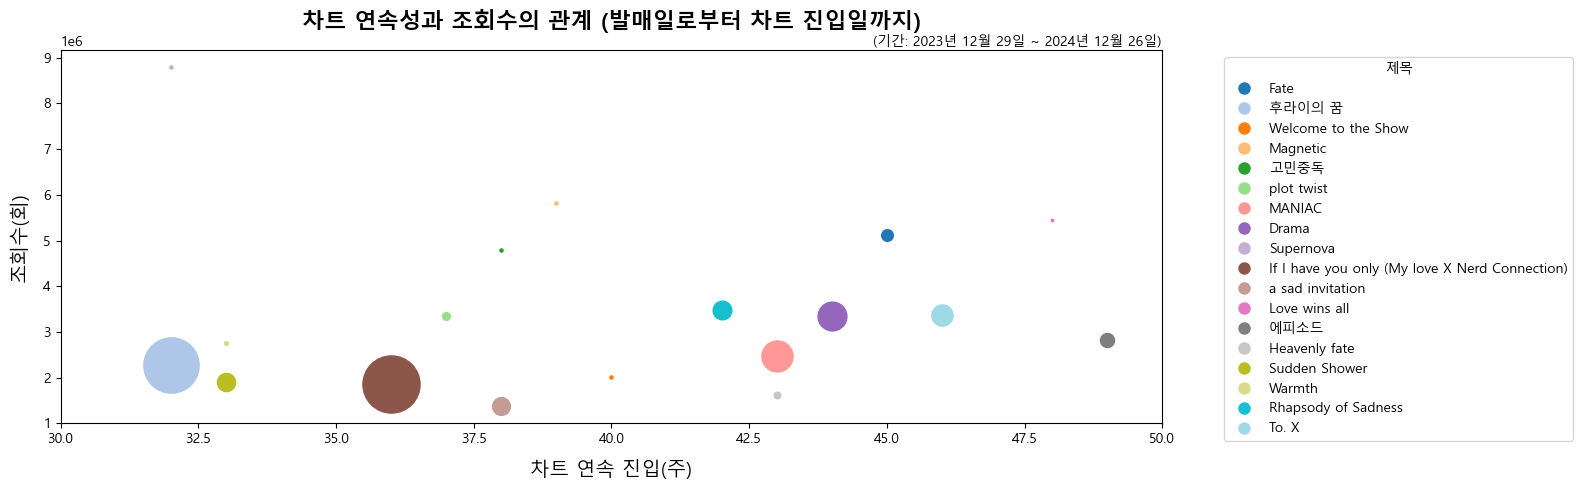

In [499]:
import matplotlib.cm as cm
from matplotlib.lines import Line2D

# 각 '제목'마다 고유한 색을 생성 (컬러맵 사용)
colors = cm.get_cmap('tab20', len(df_chart_con75_mean))

# 산점도 그리기
plt.figure(figsize=(16, 5))
for i, row in df_chart_con75_mean.iterrows():
    plt.scatter(
        row['연속'], 
        row['누적 조회수'], 
        s=row['발매일로부터 최초 차트 진입']**1.5,
        color=colors(i),  # 고유 색 지정
    )

legend_labels = [Line2D([0], [0], marker='o', color='w', markerfacecolor=colors(i), markersize=10) for i in range(len(df_chart_con75_mean))]
plt.legend(legend_labels, df_chart_con75_mean['제목'], title='제목', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.xlabel('차트 연속 진입(주)', fontsize=14, labelpad=10)
plt.ylabel('조회수(회)',fontsize=14, labelpad=10)
plt.xlim(30, 50)

plt.title('차트 연속성과 조회수의 관계 (발매일로부터 차트 진입일까지)', fontsize=16, fontweight='bold', pad=15)

plt.text(0.775, 1.04, '(기간: 2023년 12월 29일 ~ 2024년 12월 26일)', ha='right', va='top', transform=ax.transAxes)

plt.tight_layout()
plt.show()

---

In [609]:
df.groupby(['가수', '제목'])[['조회수', '순위']].sum().sort_values('조회수', ascending=False).head(10)

조회수    순위
가수          제목                            
로제 & 브루노 마스 APT.           110493800    11
QWER        고민중독           106843938   251
aespa       Supernova      104924689   154
(여자)아이들     Fate            93250227   674
ILLIT       Magnetic        93209872   486
NewJeans    How Sweet       77543655   348
아이유         Love wins all   70233892  1050
TWS         plot twist      67884481   598
aespa       Drama           67056751   796
태연          To. X           64244800  1061

In [617]:
df.groupby(['가수', '제목'])[['차트 지속기간', '발매일로부터']].max().sort_values("차트 지속기간", ascending=False).head(10)

차트 지속기간  발매일로부터
가수         제목                                                           
BLACKPINK  Kill This Love                                     60    1855
폴킴         모든 날, 모든 순간 (Every day, Every Moment)              59    2326
Anne-Marie 2002                                               58    2375
NewJeans   Attention                                          58     658
경서예지 & 전건호 다정히 내 이름을 부르면 (If you lovingly call my name)       58    1219
아이유        블루밍 (Blueming)                                     58    1613
aespa      Next Level                                         57    1109
장범준        흔들리는 꽃들 속에서 네 샴푸향이 느껴진거야                           57    1693
NewJeans   Ditto                                              57     724
BLACKPINK  마지막처럼 (As If It's Your Last)                       57    2513